In [21]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas openpyxl xlrd
fichier_conso = r"G:\8_SHAREPOINT\CYRILLE\IT\dataset_ecole_journalier.csv"
df = pd.read_csv(fichier_conso)
print(df.head())

         date  temperature_C  school_open  electricity_kWh
0  2022-01-01            1.6            0            163.7
1  2022-01-02            1.2            0            158.8
2  2022-01-03            1.1            1            255.4
3  2022-01-04           -3.9            1            299.2
4  2022-01-05           -1.9            1            269.7


In [5]:
df.describe()

,temperature_C,school_open,electricity_kWh
count,730.000000,730.000000,730.000000
mean,10.063699,0.712329,167.643151
std,7.248318,0.452987,63.674347
min,-4.500000,0.000000,51.000000
25%,3.700000,0.000000,119.125000
50%,10.200000,1.000000,157.550000
75%,16.700000,1.000000,220.400000
max,24.000000,1.000000,328.600000


In [22]:
min_value = df["electricity_kWh"].min()
min_row = df[df["electricity_kWh"] == min_value]
print(min_row[["electricity_kWh","temperature_C"]])


     electricity_kWh  temperature_C
547             51.0           21.6


In [23]:
max_value =df["electricity_kWh"].max()
temp_min = df["temperature_C"].min()
temp_max = df["temperature_C"].max()
max_row =df[df["electricity_kWh"] == max_value]
print(max_row[["electricity_kWh","temperature_C"]])
print (temp_min,temp_max)

     electricity_kWh  temperature_C
355            328.6           -4.1
-4.5 24.0


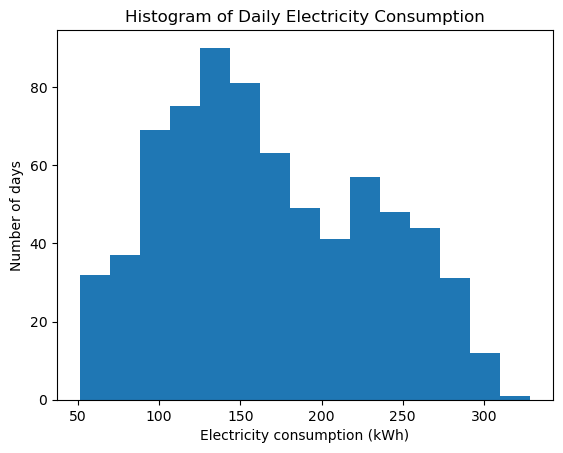

In [24]:
df["electricity_kWh"].plot(
    kind="hist",
    bins=15,
    title="Histogram of Daily Electricity Consumption"
)

plt.xlabel("Electricity consumption (kWh)")
plt.ylabel("Number of days")
plt.show()


In [25]:
Q1 = df["electricity_kWh"].quantile(0.25)
Q3 = df["electricity_kWh"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df["electricity_kWh"] < (Q1 - 0.75 * IQR)) |
    (df["electricity_kWh"] > (Q3 + 0.75 * IQR))
]

print(outliers)

           date  temperature_C  school_open  electricity_kWh
3    2022-01-04           -3.9            1            299.2
11   2022-01-12           -2.4            1            299.3
341  2022-12-08           -2.2            1            308.4
349  2022-12-16           -4.5            1            301.7
355  2022-12-22           -4.1            1            328.6
362  2022-12-29           -1.3            1            296.7
713  2023-12-15           -2.8            1            308.7
723  2023-12-25           -2.9            1            296.5


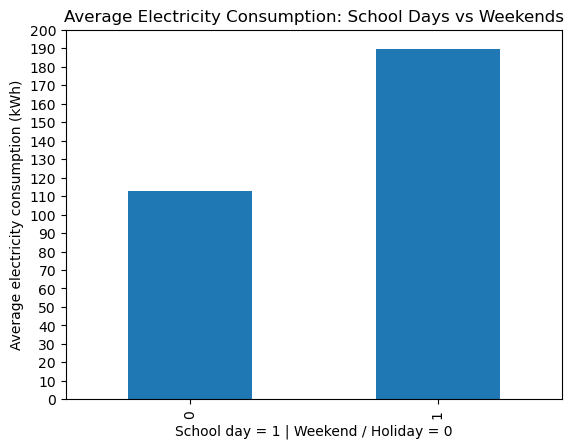

In [26]:
df.groupby("school_open")["electricity_kWh"].mean().plot(
    kind="bar",
    title="Average Electricity Consumption: School Days vs Weekends"
)

plt.ylabel("Average electricity consumption (kWh)")
plt.xlabel("School day = 1 | Weekend / Holiday = 0")
plt.yticks(range(0, int(df["electricity_kWh"].mean()) + 40, 10))
plt.show()


In [27]:
avg_weekday_consumption = df[df["school_open"] == 1]["electricity_kWh"].mean()
print("Average electricity consumption on school days:", avg_weekday_consumption)


Average electricity consumption on school days: 189.72615384615384


In [28]:
# Average electricity consumption on holidays/weekends
avg_consumption_weekend = df[df["school_open"] == 0]["electricity_kWh"].mean()
print("Average consumption on holidays/weekends:", avg_consumption_weekend)


Average consumption on holidays/weekends: 112.96142857142858


In [29]:
# Convert the "date" column to datetime
df["date"] = pd.to_datetime(df["date"])

# Function to determine the season based on the month
def season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

# Apply the function to create a new "season" column
df["season"] = df["date"].dt.month.apply(season)


    

Average electricity consumption in Winter: 224.54666666666662
Average electricity consumption in Spring: 142.33423913043478
Average electricity consumption in Summer: 111.45326086956523
Average electricity consumption in Autumn: 193.75934065934064


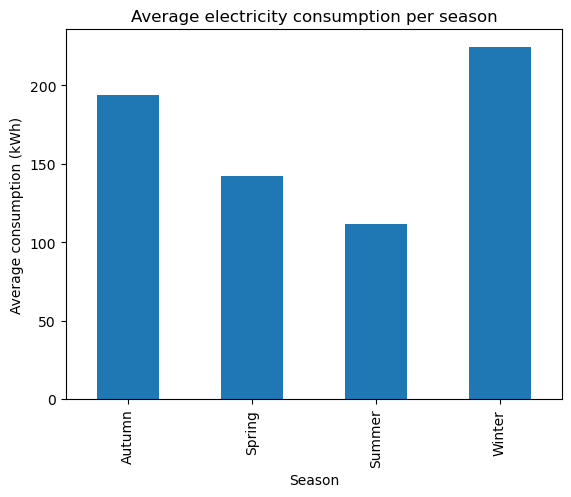

In [30]:
# Print average electricity consumption by season
print("Average electricity consumption in Winter:", df[df["season"] == "Winter"]["electricity_kWh"].mean())
print("Average electricity consumption in Spring:", df[df["season"] == "Spring"]["electricity_kWh"].mean())
print("Average electricity consumption in Summer:", df[df["season"] == "Summer"]["electricity_kWh"].mean())
print("Average electricity consumption in Autumn:", df[df["season"] == "Autumn"]["electricity_kWh"].mean())

# Plot average consumption per season
df.groupby("season")["electricity_kWh"].mean().plot(
    kind="bar", 
    title="Average electricity consumption per season"
)
plt.ylabel("Average consumption (kWh)")
plt.xlabel("Season")
plt.show()


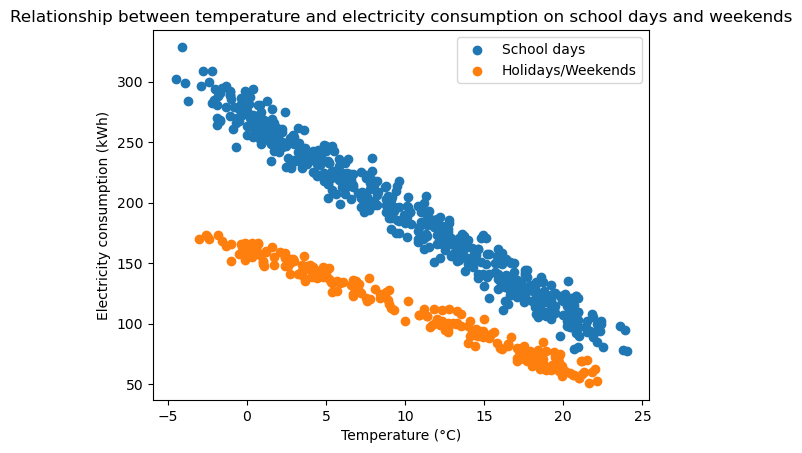

In [31]:
# Scatter plot of electricity consumption vs temperature
plt.scatter(df[df["school_open"] == 1]["temperature_C"], df[df["school_open"] == 1]["electricity_kWh"], label="School days")
plt.scatter(df[df["school_open"] == 0]["temperature_C"], df[df["school_open"] == 0]["electricity_kWh"], label="Holidays/Weekends", alpha=1)
plt.xlabel("Temperature (°C)")
plt.ylabel("Electricity consumption (kWh)")
plt.title("Relationship between temperature and electricity consumption on school days and weekends")
plt.legend()
plt.show()


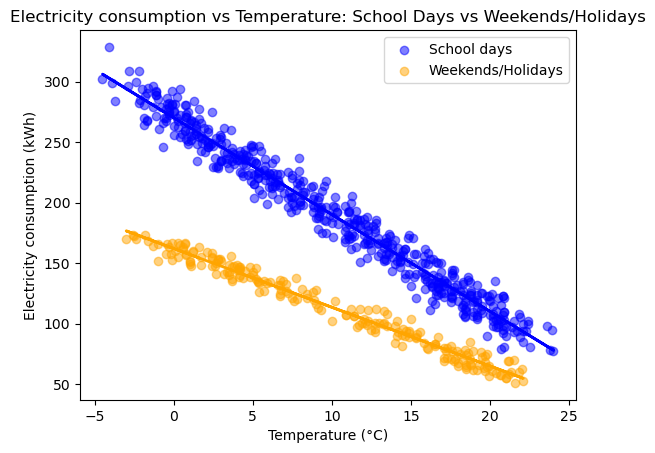

School days: each 1°C decrease leads on average to an increase of 8.00 kWh in consumption.
Weekends/Holidays: each 1°C decrease leads on average to an increase of 4.86 kWh in consumption.


In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Separate data for school days and holidays/weekends
df_school = df[df["school_open"] == 1]
df_holiday = df[df["school_open"] == 0]

# Scatter plots
plt.scatter(df_school["temperature_C"], df_school["electricity_kWh"], alpha=0.5, label="School days", color="blue")
plt.scatter(df_holiday["temperature_C"], df_holiday["electricity_kWh"], alpha=0.5, label="Weekends/Holidays", color="orange")

# Linear regression for school days
model_school = LinearRegression()
model_school.fit(df_school[["temperature_C"]], df_school["electricity_kWh"])
slope_school = model_school.coef_[0]
plt.plot(df_school["temperature_C"], model_school.predict(df_school[["temperature_C"]]), color="blue", linewidth=2)

# Linear regression for weekends/holidays
model_holiday = LinearRegression()
model_holiday.fit(df_holiday[["temperature_C"]], df_holiday["electricity_kWh"])
slope_holiday = model_holiday.coef_[0]
plt.plot(df_holiday["temperature_C"], model_holiday.predict(df_holiday[["temperature_C"]]), color="orange", linewidth=2)

# Labels and title
plt.xlabel("Temperature (°C)")
plt.ylabel("Electricity consumption (kWh)")
plt.title("Electricity consumption vs Temperature: School Days vs Weekends/Holidays")
plt.legend()
plt.show()

# Print slopes
print(f"School days: each 1°C decrease leads on average to an increase of {abs(slope_school):.2f} kWh in consumption.")
print(f"Weekends/Holidays: each 1°C decrease leads on average to an increase of {abs(slope_holiday):.2f} kWh in consumption.")


In [34]:
print(f"School days: each 1°C decrease leads on average to an increase of {abs(slope_school):.2f} kWh in consumption.")
print(f"Weekends/Holidays: each 1°C decrease leads on average to an increase of {abs(slope_holiday):.2f} kWh in consumption.")


School days: each 1°C decrease leads on average to an increase of 8.00 kWh in consumption.
Weekends/Holidays: each 1°C decrease leads on average to an increase of 4.86 kWh in consumption.
